In [100]:
import pandas as pd
ri = pd.read_csv('police.csv')
print(ri.head())

  state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   
3    RI  2005-02-20     17:15          NaN             M       White   
4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       F

In [101]:
print(ri.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

In [102]:
print(ri.isnull().sum())

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


#### since column county_name contains zero non-null values and all data entries are from the same state, we can drop these two columns

In [103]:
print(ri.shape)

ri.drop(['county_name', 'state'], axis='columns', inplace=True)

print(ri.shape)

(91741, 15)
(91741, 13)


In [104]:
print(ri.isnull().sum())

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

print('\n')
print(ri.isnull().sum())
print('\n')
print(ri.shape)

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64


(86536, 13)


#### Let's now check and fix data types of features

In [105]:
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

#### Let's begin with is_arrested column, which would make sense to be boolean since one is either arrested or not arrested

In [106]:
print(ri.is_arrested.head())

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.apply(lambda x: bool(x))

print(ri.is_arrested.dtype)

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object
bool


as a next step, let's merge date and time columns into a datetime object

In [107]:
ri[['stop_date', 'stop_time']].head()

,stop_date,stop_time
0,2005-01-04,12:55
1,2005-01-23,23:15
2,2005-02-17,04:15
3,2005-02-20,17:15
4,2005-02-24,01:20


In [108]:
# Concatenate 'stop_date' and 'stop_time' and separate by a space
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

ri['stop_datetime'] = pd.to_datetime(combined)

print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


In [109]:
# let's set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

print(ri.index)
print('\n')
print(ri.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)


Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


### Exploring the relationship between gender and policing

In [110]:
# what kind of violatoins are there
print(ri.violation.value_counts())

print('\n')
# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64


Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


##### let's see whether male and female drivers tend to commit different types of traffic violations.

In [111]:
#DataFrame of female drivers
female = ri[ri['driver_gender'] == 'F']

#DataFrame of male drivers
male = ri[ri['driver_gender'] == 'M']

# proportions of violations by female drivers
print(female.violation.value_counts(normalize=True))
print('\n')

# proportions of violations by male drivers
print(male.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64


Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


this shows that about two-thirds of female traffic stops are for speeding, whereas stops of males are more balanced among the six categories. This doesn't mean that females, according of this dataset, speed more often than males, however, since we didn't take into account the number of stops or drivers.

In [112]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86536 entries, 2005-01-04 12:55:00 to 2015-12-31 22:47:00
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           86536 non-null  object
 1   stop_time           86536 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86536 non-null  object
 4   violation_raw       86536 non-null  object
 5   violation           86536 non-null  object
 6   search_conducted    86536 non-null  bool  
 7   search_type         3307 non-null   object
 8   stop_outcome        86536 non-null  object
 9   is_arrested         86536 non-null  bool  
 10  stop_duration       86536 non-null  object
 11  drugs_related_stop  86536 non-null  bool  
 12  district            86536 non-null  object
dtypes: bool(3), object(10)
memory usage: 7.5+ MB


#### since the number one violation is speeding, let's compare the outcomes between males and females, in other words, does gender affect who gets a ticket for speeding?

In [113]:
# DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

# DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

# stop outcomes for female drivers as proportions
print(female_and_speeding.stop_outcome.value_counts(normalize=True))
print('\n')

# stop outcomes for male drivers as proportions
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64


Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


##### as you can see, the numbers are similar for males and females: about 95% of stops for speeding result in a ticket. Thus, the data fails to show that gender has an impact on who gets a ticket for speeding.

#### Calculating search rates:

In [114]:
print(ri.search_conducted.dtype)

# search rate
print(ri.search_conducted.value_counts(normalize=True))

# same search rate, this time by taking the mean since dtype is bool
print(ri.search_conducted.mean())

bool
False    0.961785
True     0.038215
Name: search_conducted, dtype: float64
0.0382153092354627


In [115]:
# search rate for both groups
print(ri.groupby(by='driver_gender').search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


###### Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

###### For example, you might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

###### one can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, one would find that males and females are searched at about the same rate for each violation. 

In [116]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86536 entries, 2005-01-04 12:55:00 to 2015-12-31 22:47:00
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           86536 non-null  object
 1   stop_time           86536 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86536 non-null  object
 4   violation_raw       86536 non-null  object
 5   violation           86536 non-null  object
 6   search_conducted    86536 non-null  bool  
 7   search_type         3307 non-null   object
 8   stop_outcome        86536 non-null  object
 9   is_arrested         86536 non-null  bool  
 10  stop_duration       86536 non-null  object
 11  drugs_related_stop  86536 non-null  bool  
 12  district            86536 non-null  object
dtypes: bool(3), object(10)
memory usage: 7.5+ MB


In [117]:
# search rate for each combination of gender and violation
print(ri.groupby(['violation','driver_gender']).\
      search_conducted.value_counts(normalize=True))

violation            driver_gender  search_conducted
Equipment            F              False               0.960016
                                    True                0.039984
                     M              False               0.928504
                                    True                0.071496
Moving violation     F              False               0.960743
                                    True                0.039257
                     M              False               0.938476
                                    True                0.061524
Other                F              False               0.958982
                                    True                0.041018
                     M              False               0.953809
                                    True                0.046191
Registration/plates  F              False               0.945076
                                    True                0.054924
                     M              F

#### as you can see, for all types of violations, the search rate is higher for males than for females, disproving the second-factor hypothesis.

##### During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk." let's  check to see how many times "Protective Frisk" was the only search type.

In [118]:
# Count of 'search_type' values
print(ri.search_type.value_counts())
print('\n')

# Checking if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains("Protective Frisk", na=False)

print(ri.frisk.dtype)
print('\n')
print(ri.frisk.sum())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

###### It looks like there were 303 drivers in total who were frisked.

let's now compare the rates at which female and male drivers are frisked during a search. Are males frisked more often than females, perhaps because police officers consider them to be higher risk?

In [119]:
# DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Overall frisk rate
print(searched.frisk.mean())

# Frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.09162382824312065
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


The frisk rate seems to be higher for males than for females, though one can't conclude that this difference is caused simply by the driver's gender.

### Visualising statistics

at first, let's try to find out whether arrest rate varies by the time of the day 

In [120]:
# overall arrest rate
print(ri.is_arrested.mean())

# hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.0355690117407784
stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


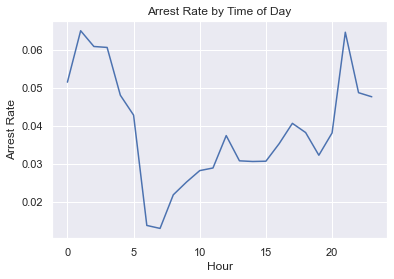

In [121]:
import matplotlib.pyplot as plt

# line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot(kind='line')
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')
plt.show()

###### The arrest rate seems to have a significant spike overnight, and then dips in the early morning hours.

### Let's assess whether drug-related stops are becoming more common over time.

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64




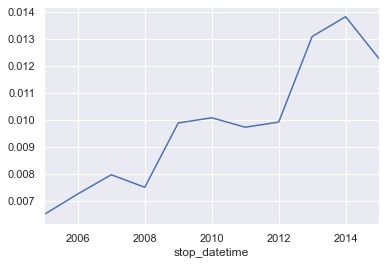

In [122]:
# annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())
print('\n')
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# plot of 'annual_drug_rate'
annual_drug_rate.plot(kind='line')
plt.show()

#### The rate of drug-related stops seems to have nearly doubled over the course of 10 years.

One might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

let's test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then we'll see both rates increasing over time.

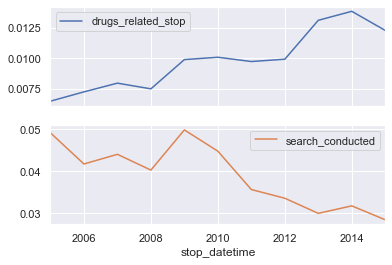

In [123]:
# annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')
# since oy scales are different, subplots would be a good idea
annual.plot(subplots=True)
plt.show()

#### This is interesting, it turns out that the rate of drug-related stops increased even though the search rate decreased, disproving my hypothesis.

The state of Rhode Island is broken into six police districts, also known as zones. let's find out how the zones compare in terms of what violations are caught by police.

In [124]:
ri.district.value_counts()

Zone X4    22503
Zone K3    19560
Zone K2    17662
Zone X3    16174
Zone K1     8296
Zone X1     2341
Name: district, dtype: int64

In [125]:
# frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))
all_zones = pd.crosstab(ri.district, ri.violation)

print('\n')

print(all_zones.loc['Zone K1':'Zone K3'])
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  


violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1    

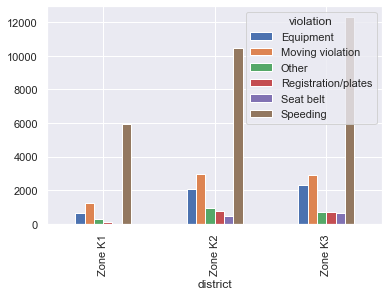

In [126]:
# bar plot of 'k_zones'
k_zones.plot(kind='bar')
plt.show()

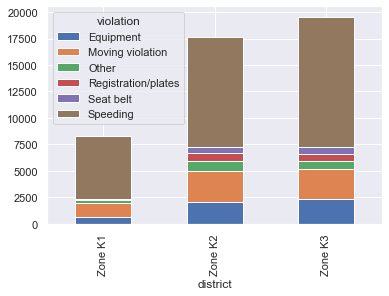

In [127]:
# stacked bar plots for better comparison
k_zones.plot(kind='bar', stacked=True)
plt.show()

#### The vast majority of traffic stops in Zone K1 seem to be for speeding, and Zones K2 and K3 are remarkably similar to one another in terms of violations.

In the traffic stops dataset, the stop_duration column describes approximately how long the driver was detained by the officer, however, the durations are stored as strings, such as '0-15 Min' in order for it to be possible to analyze, it is necessary to convert them to numerical values, but the problem is, precise duration is not available, which means we have to estimate and replace ranges with certain integers, let's at first create a mapping dictionary:

In [128]:
print(ri.stop_duration.unique())
print('\n')

# dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

# 'stop_duration' strings --> integers
ri['stop_minutes'] = ri.stop_duration.map(mapping)

print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min']


[ 8 23 45]


#### let's now try to answer the the question: If you were stopped for a particular violation, how long might you expect to be detained?

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64




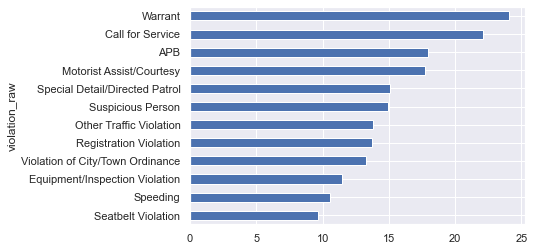

In [129]:
# proportion of 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw')['stop_minutes'].mean())
print('\n')

stop_length = ri.groupby('violation_raw')['stop_minutes'].mean()
stop_length.sort_values().plot(kind='barh')
plt.show()

## Analyzing the effect of weather on policing

weather data is contained in a separate dataset, let's at first check that data makes sence and is reliable

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


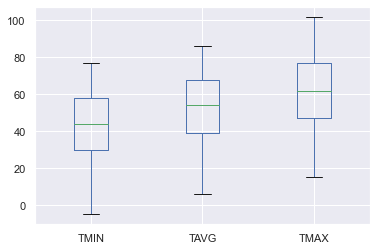

In [130]:
weather = pd.read_csv('policeWeather.csv')
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')
plt.show()

#### The temperature data looks good so far: the TAVG values are in between TMIN and TMAX, and the measurements and ranges seem reasonable.

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


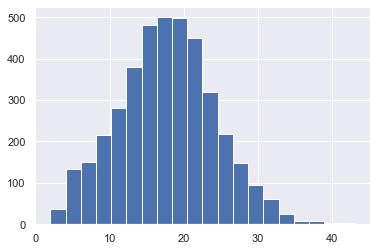

In [131]:
weather['TDIFF']=weather.TMAX - weather.TMIN
print(weather.TDIFF.describe())
weather.TDIFF.hist(bins=20)
plt.show()

##### manually computing the min-max temperature difference shows that the TDIFF column has no negative values and its distribution is approximately normal, both of which are signs that the data is trustworthy.

The weather DataFrame contains 20 columns that start with 'WT', each of which represents a bad weather condition. For example:

WT05 indicates "Hail"
WT11 indicates "High or damaging winds"
WT17 indicates "Freezing rain"
For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day) or NaN (meaning the condition was not present).

we can quantify "how bad" the weather was each day by counting the number of 1 values in each row:

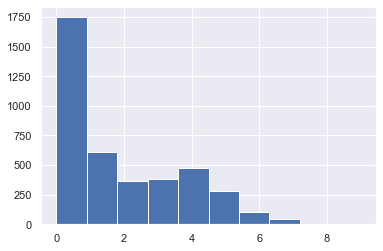

In [132]:
import seaborn as sns
sns.set()
WT = weather.loc[:, 'WT01':'WT22']
weather['bad_conditions'] = WT.sum(axis='columns')
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')
weather.bad_conditions.hist()
plt.show()

##### It looks like many days didn't have any bad weather conditions, and only a small portion of days had more than four bad weather conditions. now let's rate the weather conditions and come up with some rating system:

since the counts range from 0 to 9, they can be converted to ratings as follows:

Convert 0 to 'good'
Convert 1 through 4 to 'bad'
Convert 5 through 9 to 'worse'

In [133]:
print(weather.bad_conditions.value_counts().sort_index())

# dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad' ,4:'bad' ,5:'worse' ,6:'worse' ,7:'worse' ,8:'worse' ,9:'worse' }

# map the 'bad_conditions' integers to strings
weather['rating'] = weather.bad_conditions.map(mapping)

print('\n')
print(weather.rating.value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64


bad      1836
good     1749
worse     432
Name: rating, dtype: int64


###### Since the rating column only has a few possible values, let's change its data type to category in order to store the data more efficiently. let's also specify a logical order for the categories, which will be useful for future exercises.

In [134]:
from pandas.api.types import CategoricalDtype

# Category parameter list
cats = ['good', 'bad', 'worse']

weather['rating'] = weather.rating.astype(CategoricalDtype(ordered=True, categories=cats))

print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']


##### Let's now merge the two dataframes

In [135]:
ri.reset_index(inplace=True)
print(ri.head())

weather_rating = weather[['DATE', 'rating']]

print('\n')
print(weather_rating.head())

        stop_datetime   stop_date stop_time driver_gender driver_race  \
0 2005-01-04 12:55:00  2005-01-04     12:55             M       White   
1 2005-01-23 23:15:00  2005-01-23     23:15             M       White   
2 2005-02-17 04:15:00  2005-02-17     04:15             M       White   
3 2005-02-20 17:15:00  2005-02-20     17:15             M       White   
4 2005-02-24 01:20:00  2005-02-24     01:20             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome  is_arrested stop_duration  drugs_related_stop district  \
0       Citation

In [136]:
print(ri.shape)
print('\n')

ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')
print(ri_weather.shape)
ri_weather.set_index('stop_datetime', inplace=True)

(86536, 16)


(86536, 18)


### Comparing arrest rates by weather rating


In [137]:
# overall arrest rate
print(ri_weather.is_arrested.mean())
print('\n')

# arrest rate for each 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())
print('\n')

# arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation', 'rating']).is_arrested.mean())

0.0355690117407784


rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64


violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


#### seems like the arrest rate increases as the weather gets worse, and that trend persists across many of the violation types. This doesn't prove a causal link, but it's quite an interesting result!

In [138]:
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()
print(arrest_rate)
print('\n')

# arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad']) 
print('\n')

# arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding']) 

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


0.05804964058049641


rating
good     0.013405
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64
